# Blood Glucose (milimol/L) Classification
### CISC 452
### Group Aud1_1 - Prj_23
### Max Kang (20172211)
### Nov 26th 2022 - Dec 05th 2022

Import Libraries


In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import pyreadr
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


Load the data

In [9]:
# Read csv into array
result = loadmat('pone.0197134.s005.mat')

# Trim dataset into dataframe
Xfilt = result['Xfilt']
nested = Xfilt[0][0]
data = nested[0]
ID = pd.DataFrame(nested[1],columns=["Person No", "Analysis Day"])
numdate = pd.DataFrame(nested[2],columns=["num date"])
setting = pd.DataFrame(nested[3],columns=["setting"])
skin = pd.DataFrame(nested[4],columns=["skin depth"])
yref = pd.DataFrame(nested[5],columns=["Blood Glucose Level"])

axis = nested[6] 
data_pd = pd.DataFrame(data * (1/axis))
df = pd.concat([setting, skin, data_pd, yref], axis=1, join='inner')
 
# Initialize the data vector
yref = pd.DataFrame(df1["Blood Glucose Level"],columns=["Blood Glucose Level"])
df1.drop("Blood Glucose Level", axis=1)

print('Shape of dataset' df.shape)
print(len(yref))


df1.head()


(4341, 943)
4341


,setting,skin depth,0,1,2,3,4,5,6,7,...,931,932,933,934,935,936,937,938,939,Blood Glucose Level
0,250,170,93.099962,92.481593,92.028317,91.488052,90.890810,90.413705,90.022916,89.627516,...,5.722661,5.717672,5.696312,5.649615,5.608086,5.598972,5.569059,5.523360,5.500901,14.400000
1,250,170,80.016572,79.450249,79.055381,78.517258,77.921770,77.485062,77.164876,76.852822,...,4.559388,4.540691,4.518371,4.502473,4.474175,4.454401,4.418252,4.391482,4.380370,14.100000
2,250,170,89.704920,89.086513,88.683207,88.188938,87.592824,87.093908,86.670429,86.268191,...,5.349344,5.337310,5.314715,5.279771,5.266575,5.238809,5.198213,5.155455,5.151816,7.070588
3,250,170,82.713736,82.059888,81.605776,81.204001,80.651887,80.181255,79.778359,79.417786,...,4.866487,4.865145,4.835927,4.810635,4.777480,4.758903,4.729842,4.685953,4.676358,8.300000
4,250,170,95.022817,94.356762,93.950372,93.458364,92.835402,92.252122,91.743877,91.521976,...,5.766719,5.745401,5.718345,5.689691,5.642981,5.627188,5.603679,5.540202,5.560164,12.700000


In [10]:
# Need labels of 1 / 0 whether or not they're in the normal blood sugar range
# if over 13.9 mmol/l they are out of the normal range:
#  |--------[5mmol/l------NORMAL-----7mmol/l]--------------|
#
y = np.array([0 if 5 <= y <= 7.8 else 1 for y in np.array(yref)])
#
num_true_class = (np.ones(len(y)) == y).sum()
num_false_classes = (np.zeros(len(y)) == y).sum()
#
print('Number of people outside normal glucose threshold:', num_true_class)
print('Number of people inside normal glucose threshold:', num_false_classes)

Number of people outside normal glucose threshold: 3074
Number of people inside normal glucose threshold: 1267


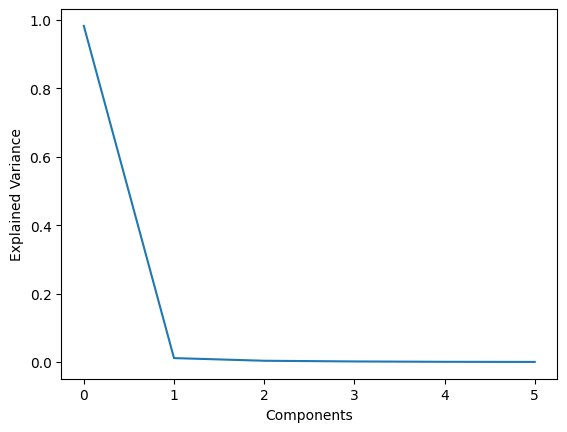

In [11]:
# Perform PCA to reduce dimensionality
pca = PCA(n_components=6)

# Fit to the pca model
pca.fit(df.T)

# Plot results
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

/tmp/ipykernel_5590/2771465450.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.T[:,1], X.T[:,0], edgecolor='none', alpha=0.5,


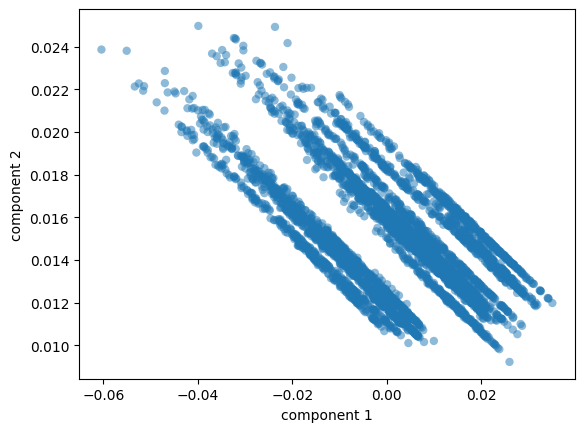

In [38]:
# Grab first two vectors of PCA to reduce data dimension
X = pca.components_[:2] 

# Visualize the new data
plt.scatter(X.T[:,1], X.T[:,0], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('autumn', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()


In [39]:
# Separate train/test sets
x_train, x_test, y_train, y_test = train_test_split(X.T, y, test_size=0.20, random_state=420)

print('training length size', len(x_train))
print('testing set size', len(x_test))



training length size 3472
testing set size 869


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

#Train the rrandom forest classifier using the training sets
rfc = RandomForestClassifier(max_depth=18,
                             min_samples_leaf= 2,
                             min_samples_split =2, 
                             n_estimators=256, 
                             random_state=0
)
rfc.fit(x_test,y_test)

# Predict the labels
ypred = rfc.predict(x_test)

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Model Accuracy
print("random forest REPORT")
print(classification_report(ypred, y_test))

ypredtrain = rfc.predict(x_train)
print("test accuracy :",metrics.accuracy_score(y_train, ypredtrain))

print(confusion_matrix(ypred, y_test))
print("validation accuracy:",metrics.accuracy_score(y_test, ypred))



random forest REPORT
              precision    recall  f1-score   support

           0       0.70      0.99      0.82       171
           1       1.00      0.89      0.94       698

    accuracy                           0.91       869
   macro avg       0.85      0.94      0.88       869
weighted avg       0.94      0.91      0.92       869

test accuracy : 0.6696428571428571
[[170   1]
 [ 74 624]]
validation accuracy: 0.9136939010356732


[Text(0.4374296875, 0.9736842105263158, '[0.01409414 0.01061924] <= 0.011\ngini = 0.409\nsamples = 557\nvalue = [249, 620]'),
 Text(0.21975, 0.9210526315789473, '[0.01606195 0.00153818] <= 0.004\ngini = 0.477\nsamples = 18\nvalue = [17, 11]'),
 Text(0.21175, 0.868421052631579, 'gini = 0.0\nsamples = 2\nvalue = [0, 3]'),
 Text(0.22775, 0.868421052631579, '[0.01409414 0.01061924] <= 0.011\ngini = 0.435\nsamples = 16\nvalue = [17, 8]'),
 Text(0.21175, 0.8157894736842105, '[0.01606195 0.00153818] <= 0.022\ngini = 0.375\nsamples = 6\nvalue = [2, 6]'),
 Text(0.20375, 0.7631578947368421, 'gini = 0.0\nsamples = 4\nvalue = [0, 5]'),
 Text(0.21975, 0.7631578947368421, 'gini = 0.444\nsamples = 2\nvalue = [2, 1]'),
 Text(0.24375, 0.8157894736842105, '[0.01409414 0.01061924] <= 0.011\ngini = 0.208\nsamples = 10\nvalue = [15, 2]'),
 Text(0.23575, 0.7631578947368421, 'gini = 0.0\nsamples = 7\nvalue = [11, 0]'),
 Text(0.25175, 0.7631578947368421, 'gini = 0.444\nsamples = 3\nvalue = [4, 2]'),
 Text(0.6

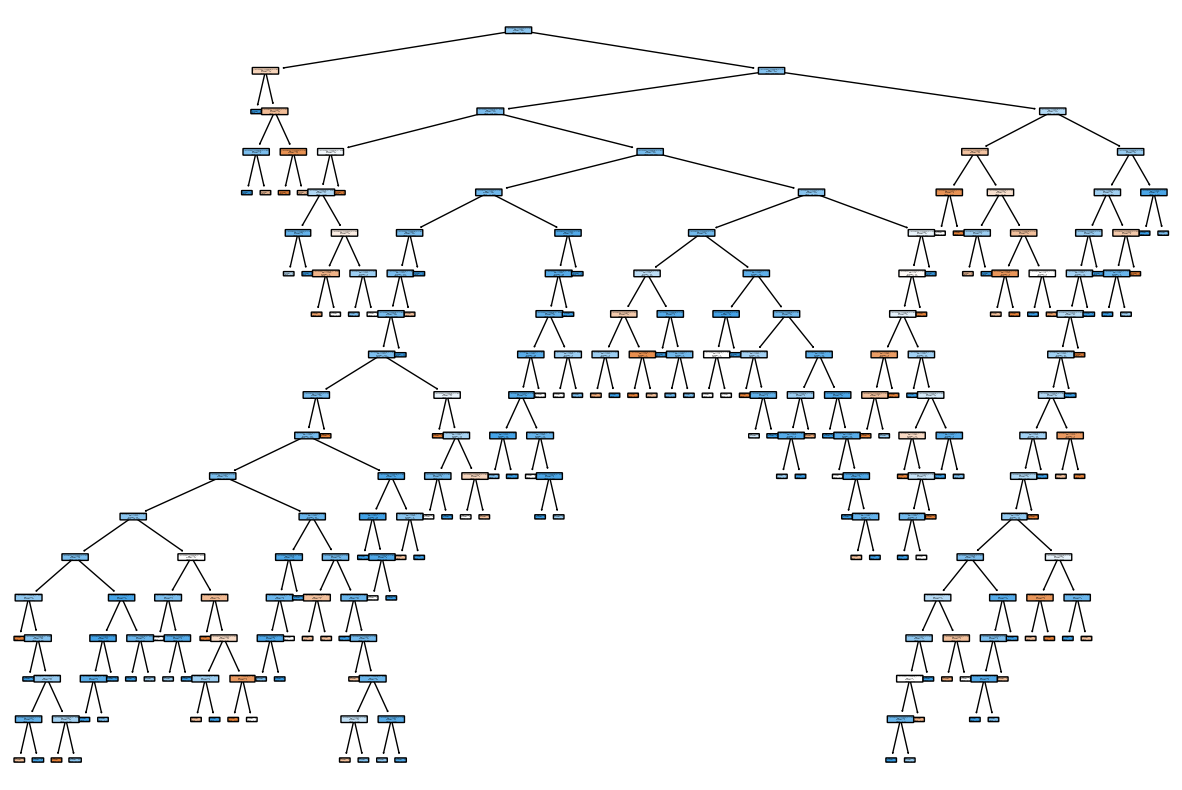

In [42]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(rfc.estimators_[0], 
            feature_names=[X[:,1], X[:,0]],
          filled=True, impurity=True, 
          rounded=True)